In [1]:
#Titanic Survived
#Import
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#non filtered data
#data load & # Analyze of data types 
df_not_filtred = pd.read_csv("data_sets/titanic.csv")
df_not_filtred.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

#### Filter data

In [3]:
df = df_not_filtred[df_not_filtred.Age.notnull()]
df.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

In [4]:
# Del "0" Index column
df = pd.read_csv("data_sets/titanic.csv", index_col=0)
df[:3]

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S

In [5]:
# Column name
#list(df)
#list(df.columns.values)
#-----------------
#for col in df.columns: 
#    print(col) 

In [6]:
df.dtypes
#df.info

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [7]:
df.shape

(891, 11)

In [8]:
#Categorical features

In [9]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
df["Pclass"].value_counts().sort_index()

1    216
2    184
3    491
Name: Pclass, dtype: int64

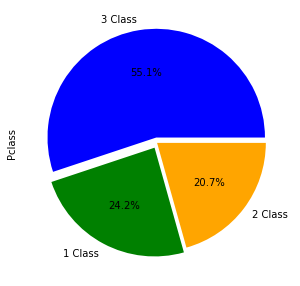

In [11]:
plt.figure(figsize=(5,5))
labels = ["3 Class", "1 Class", "2 Class"]
value = list(df["Pclass"].value_counts())
expload = [0.05, 0.05, 0]
colors = ["blue", "green", "orange"]

df["Pclass"].value_counts().plot.pie(autopct="%.1f%%", explode=expload, labels = labels, colors = colors )

In [12]:
# quantitative feature

In [13]:
df["Age"].mean()

29.69911764705882

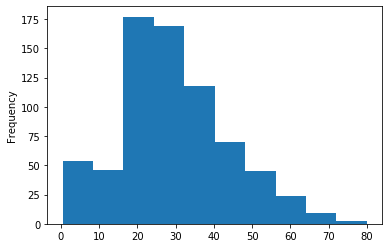

In [14]:
df["Age"].plot(kind="hist")

In [15]:
df["Age"].value_counts() #.plot(kind="pie")

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [16]:
df["Age"].value_counts() #.sort_index()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [17]:
#### "AGE_GROUP"

In [18]:
df["age_bins"] = pd.cut(x=df['Age'], bins=[10, 20, 30, 40, 50, 60, 70, 85])

In [19]:
df.head(5)

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  age_bins  
PassengerId                                                                    
1                1      0         A/5 21171   7.2500   NaN        S  (20, 30]  
2                1      0          PC 17599  71.2833   C85        C  (30, 40]  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  (20, 30]  
4                1      0            113803  53.1000  C123        S  (30, 40]  
5                0      0            373450   8.0500   NaN        S  (30, 40]

In [20]:
df.groupby("age_bins").count()

Survived  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  Fare  Cabin  \
age_bins                                                                        
(10, 20]       115     115   115  115  115    115    115     115   115     19   
(20, 30]       230     230   230  230  230    230    230     230   230     40   
(30, 40]       155     155   155  155  155    155    155     155   155     50   
(40, 50]        86      86    86   86   86     86     86      86    86     33   
(50, 60]        42      42    42   42   42     42     42      42    42     22   
(60, 70]        17      17    17   17   17     17     17      17    17      9   
(70, 85]         5       5     5    5    5      5      5       5     5      2   

          Embarked  
age_bins            
(10, 20]       115  
(20, 30]       230  
(30, 40]       154  
(40, 50]        86  
(50, 60]        42  
(60, 70]        16  
(70, 85]         5

In [21]:
df.groupby("age_bins").size()

age_bins
(10, 20]    115
(20, 30]    230
(30, 40]    155
(40, 50]     86
(50, 60]     42
(60, 70]     17
(70, 85]      5
dtype: int64

In [22]:
df["AGE_GROUP_COL"] = df["Age"]
df["AGE_GROUP_COL"].fillna(-1, inplace=True) # Fix ValueError: cannot convert float NaN to integer 
df["AGE_GROUP_COL"] = df["AGE_GROUP_COL"].map(lambda age: int(age // 10) + 1)
df[:3]

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  age_bins  \
PassengerId                                                                     
1                1      0         A/5 21171   7.2500   NaN        S  (20, 30]   
2                1      0          PC 17599  71.2833   C85        C  (30, 40]   
3                0      0  STON/O2. 3101282   7.9250   NaN        S  (20, 30]   

             AGE_GROUP_COL  
PassengerId                 
1                        3  
2                        4  
3                        3

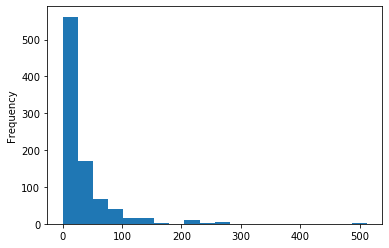

In [23]:
df.Fare.plot.hist(bins=20)

In [24]:
df["AGE_GROUP_COL"].value_counts()

3    220
0    177
4    167
2    102
5     89
1     62
6     48
7     19
8      6
9      1
Name: AGE_GROUP_COL, dtype: int64

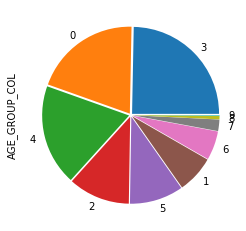

In [25]:
expload = [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]
df["AGE_GROUP_COL"].value_counts().plot.pie(explode=expload)

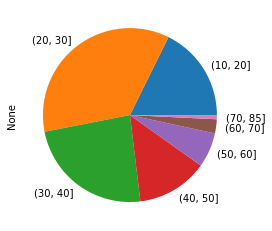

In [26]:
df.groupby("age_bins").size().plot.pie()

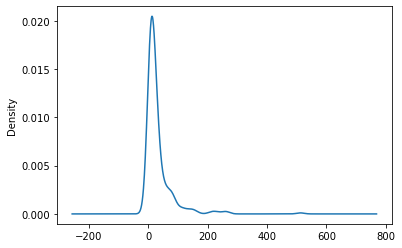

In [27]:
# Kernel Density Estimation
df.Fare.plot.kde()

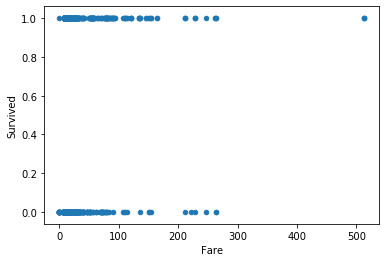

In [28]:
df.plot.scatter(x="Fare", y="Survived")

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

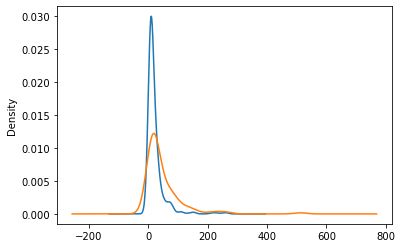

In [29]:
df.groupby("Survived").Fare.plot.kde()

(0, 200)

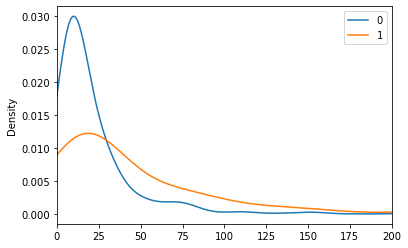

In [30]:
df.groupby("Survived").Fare.plot.kde()
plt.legend()
plt.xlim(0, 200)


Text(0.5, 1.0, 'Visualization')

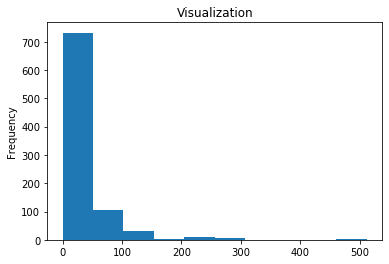

In [31]:
ax = df.Fare.plot.hist()
ax.set_title("Visualization")
#ax.figure.savefig("for_save.png")

1
2
3


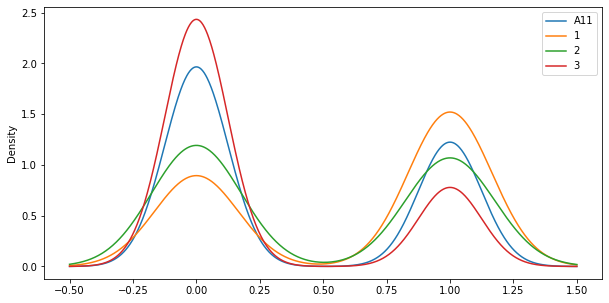

In [32]:
fig, ax = plt.subplots(figsize=(10,5))
df.Survived.plot.kde(label="A11", ax=ax)
for label, class_df in df.groupby("Pclass"):
    print(label)
    class_df.Survived.plot.kde(ax=ax, label=label)
plt.legend()


### Investigation of the correlation between 2 features

In [33]:
df[["AGE_GROUP_COL", "Survived"]][:3]

AGE_GROUP_COL  Survived
PassengerId                         
1                        3         0
2                        4         1
3                        3         1

In [34]:
age_by_survived = df.groupby(["AGE_GROUP_COL", "Survived"])
age_by_survived

In [35]:
age_by_survived.size()

AGE_GROUP_COL  Survived
0              0           125
               1            52
1              0            24
               1            38
2              0            61
               1            41
3              0           143
               1            77
4              0            94
               1            73
5              0            55
               1            34
6              0            28
               1            20
7              0            13
               1             6
8              0             6
9              1             1
dtype: int64

In [36]:
age_by_survived = age_by_survived.size().unstack()
age_by_survived

Survived           0     1
AGE_GROUP_COL             
0              125.0  52.0
1               24.0  38.0
2               61.0  41.0
3              143.0  77.0
4               94.0  73.0
5               55.0  34.0
6               28.0  20.0
7               13.0   6.0
8                6.0   NaN
9                NaN   1.0

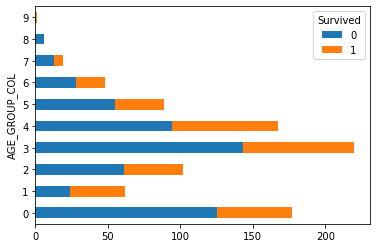

In [37]:
age_by_survived.fillna(0).plot(kind='barh', stacked=True)

In [38]:
age_by_survived_without_na = age_by_survived[1:].fillna(0)
age_by_survived_without_na

Survived           0     1
AGE_GROUP_COL             
1               24.0  38.0
2               61.0  41.0
3              143.0  77.0
4               94.0  73.0
5               55.0  34.0
6               28.0  20.0
7               13.0   6.0
8                6.0   0.0
9                0.0   1.0

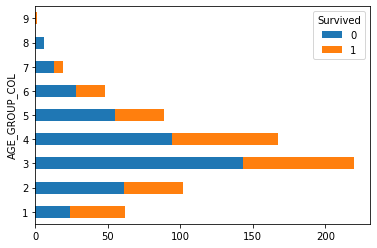

In [39]:
age_by_survived_without_na.plot(kind='barh', stacked=True)